# Tutorial 6 - Termodinámica Avanzada

## Calculo de LLE LLE para una mezcla de fluidos usando PC-SAFT

En este tutorial se ilustran los cálculos de LLE con ```pcsaft``` EoS.

Primero, se importan todos los módulos necesarios.

- numpy: interfaz numérica y trabajo con arrays.
- matplotlib: para graficar resultados.
- ternario: traza gráficos ternarios en Python.
- epcsaftpy: paquete con la EoS
- sgtpy: paquete con funciones de equilibrio de fase.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ternary
from epcsaftpy import component, mixture, pcsaft
from sgtpy.equilibrium import flash

c:\Users\nfgaj\anaconda3\Lib\site-packages\sgtpy\gammamie_mixtures\association_aux.py:76: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
c:\Users\nfgaj\anaconda3\Lib\site-packages\sgtpy\gammamie_mixtures\association_aux.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
c:\Users\nfgaj\anaconda3\Lib\site-packages\sgtpy\gammamie_

Ahora, los componentes puros se configuran y crean con la función ```component```. Luego, se crea una mezcla con ellos usando la función ```mixture``` o agregando (`+`) componentes puros. Los parámetros de interacción se configuran con el método ```mixture.pcsaft```. Finalmente, el objeto ```eos``` se crea con la función ```pcsaft```.

El objeto ```eos``` incluye todos los métodos necesarios para calcular equilibrios de fase y propiedades interfaciales usando PC-SAFT EoS.

Para este tutorial, todos los cálculos se ejemplifican para una mezcla de butanol, agua y hexano.

In [2]:
hexane = component('hexane', pure_path = 'parameters/solvents.json')
butanol = component('butanol', pure_path = 'parameters/solvents.json')
water = component('water', pure_path = 'parameters/solvents.json')

# Creando una mezcla con la función de clase de mezcla
mix = butanol + water + hexane
eos = pcsaft(mix)

## Cálculo de LLE

Este tipo de cálculo de equilibrios se lleva a cabo para una composición global (z), temperatura (K) y presión (Pa) dadas. Este cálculo se puede realizar con la función ```flash``` o ```lle```.

El cálculo flash se lleva a cabo con la función ```flash``` y requiere valores iniciales para la composición de fases ```x0```, ```w0``` y su estado de agregación (```LL` `` para equilibrios líquido/líquido).

El ```lle``` requiere valores iniciales para la composición de fase ```x0``` y ```w0```.

La opción ```full_output``` permite obtener toda la información relacionada con el cálculo del LLE. Esto incluye el volumen de las fases y la solución para la fracción de los sitios no unidos de cada fase.

In [3]:
from sgtpy.equilibrium import lle
# phase equilibria conditions
T = 305.  # K
P = 1.01325e5  # Pa
z = np.array([0.3, 0.6, 0.1])
# initial guesses
x0 = np.array([0.5, 0.2, 0.3])
w0 = np.array([0.05, 0.9, 0.05])
lle(x0, w0, z, T, P, eos, full_output=True)

           T: 305.0
           P: 101325.0
 error_outer: 2.8587222131465627e-10
 error_inner: 1.119692257723973e-10
        iter: 12
        beta: array([0.57044182, 0.42955818])
       tetha: array([0.])
           X: array([[5.23108530e-01, 3.01594656e-01, 1.75296814e-01],
       [3.71781375e-03, 9.96274350e-01, 7.83593438e-06]])
           v: [7.741028678096705e-05, 1.8378617265688547e-05]
        Xass: [array([0.15625852, 0.15625852, 0.12148938, 0.12148938]), array([0.06141221, 0.06141221, 0.04701065, 0.04701065])]
      states: ['L', 'L']
      method: 'ASS'

## Diagrama ternario a presión y temperatura constantes

Para calcular un diagrama LLE ternario, se recomienda calcular primero el LLE para los subsistemas binarios.

<!-- Luego, dependiendo del tipo de diagrama (con o sin punto crítico), puede generar una ruta de composición global para calcular el LLE. -->

In [4]:
n = 100 
X = np.zeros([3, n])
W = np.zeros([3, n])
vx = np.zeros(n)
vw = np.zeros(n)

# LLE para el subsistema butanol - agua
i = 0
z1 = np.array([0.3, 0.7, 0.])
x1 = np.array([0.4, 0.6, 0.])
w1 = np.array([0.15, 0.85, 0.])
sol = lle(x1, w1, z1, T, P, eos, full_output=True)
X[:, i], W[:, i] = sol.X
vx[i], vw[i] = sol.v
sol

           T: 305.0
           P: 101325.0
 error_outer: 2.281219438502084e-09
 error_inner: 1.6327093048849423e-10
        iter: 14
        beta: array([0.53231551, 0.46768449])
       tetha: array([0.])
           X: array([[0.55943638, 0.44056362, 0.        ],
       [0.00471116, 0.99528884, 0.        ]])
           v: [6.049847980022815e-05, 1.8450609840464722e-05]
        Xass: [array([0.12338644, 0.12338644, 0.09536025, 0.09536025]), array([0.06156543, 0.06156543, 0.04712731, 0.04712731])]
      states: ['L', 'L']
      method: 'ASS'

In [5]:
# LLE para el subsistema agua - hexano
i = n-1
z0 = np.array([0.0, 0.5, 0.5])
x0 = np.array([0.0, 0.0, 1.0])
w0 = np.array([0.0, 1.0, 0.0])

sol = lle(x0, w0, z0, T, P, eos, full_output=True)
X[:, i], W[:, i] = sol.X
vx[i], vw[i] = sol.v
sol

           T: 305.0
           P: 101325.0
 error_outer: 6.803114903945184e-09
 error_inner: 1.000152849025505e-10
        iter: 9
        beta: array([0.50440062, 0.49559938])
       tetha: array([0.])
           X: array([[0.00000000e+00, 8.73307694e-03, 9.91266923e-01],
       [0.00000000e+00, 9.99991215e-01, 8.78527096e-06]])
           v: [0.0001329087098269699, 1.8106460685789537e-05]
        Xass: [array([0.84268815, 0.84268815, 0.79681481, 0.79681481]), array([0.06082896, 0.06082896, 0.04656672, 0.04656672])]
      states: ['L', 'L']
      method: 'ASS'

In [6]:
# ggenerando ruta de composición global (Z)
i = 0
z0 = (X[:, i] + W[:, i])/2
i = -1
z1 = (X[:, i] + W[:, i])/2
Zs = np.linspace(z0, z1, n)

# calcular LLE utilizando composiciones y volúmenes calculados previamente como conjeturas iniciales
for i in range(1, n-1):
    sol = lle(X[:, i-1], W[:, i-1], Zs[i], T, P, eos, v0=[vx[i-1], vw[i-1]], full_output=True)
    X[:, i], W[:, i] = sol.X
    vx[i], vw[i] = sol.v
    # print(i, sol.error_outer, sol.error_inner, sol.tetha, sol.iter)

Los resultados se grafican a continuación utilizando el paquete ``Ternary``

(-0.05, 1.05, -0.1, 0.9)

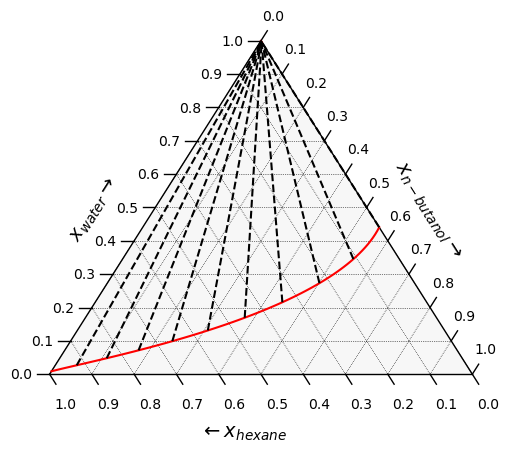

In [7]:
fig = plt.figure(figsize = (6,5))

fontsize = 14
ax3 = fig.add_subplot(111)
tax = ternary.TernaryAxesSubplot(ax=ax3, scale = 1.0)
tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=0.1, linewidth=0.5)

tax.plot(X.T, color = "r")
tax.plot(W.T, color = "r")
# tax.plot(Zs, color = "b")

for i in range(0, n, 10):
    tax.plot([X[:, i], W[:, i]], linestyle='--', color='k')

tax.ticks(clockwise=True, multiple=0.1, linewidth=1, offset = 0.03,tick_formats='%.1f')


#Set labels
tax.right_axis_label(r"$x_{n-butanol}\rightarrow$", fontsize=fontsize, offset = 0.15)
tax.left_axis_label(r"$x_{water} \rightarrow$", fontsize=fontsize, offset = 0.15)
tax.bottom_axis_label(r"$\leftarrow x_{hexane}$", fontsize=fontsize, offset = 0.15)


# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax._redraw_labels()
ternary.plt.axis('off')
#fig.savefig('lle-ternary.pdf')